In [1]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid",context='talk', font_scale=1.1)
%matplotlib inline

In [2]:
import numpy as np
import random as rnd
import pandas as pd

In [3]:
fec_data = pd.read_csv('./fec_data.csv', sep=',', index_col=0)

In [4]:
fec_data.head()

,index,Worm ID,Strain,Day,Progeny Count,Diet
0,0,1,RSC017,Day 1,27,OP50
1,1,2,RSC017,Day 1,24,OP50
2,2,3,RSC017,Day 1,26,OP50
3,3,4,RSC017,Day 1,7,OP50
4,4,5,RSC017,Day 1,23,OP50


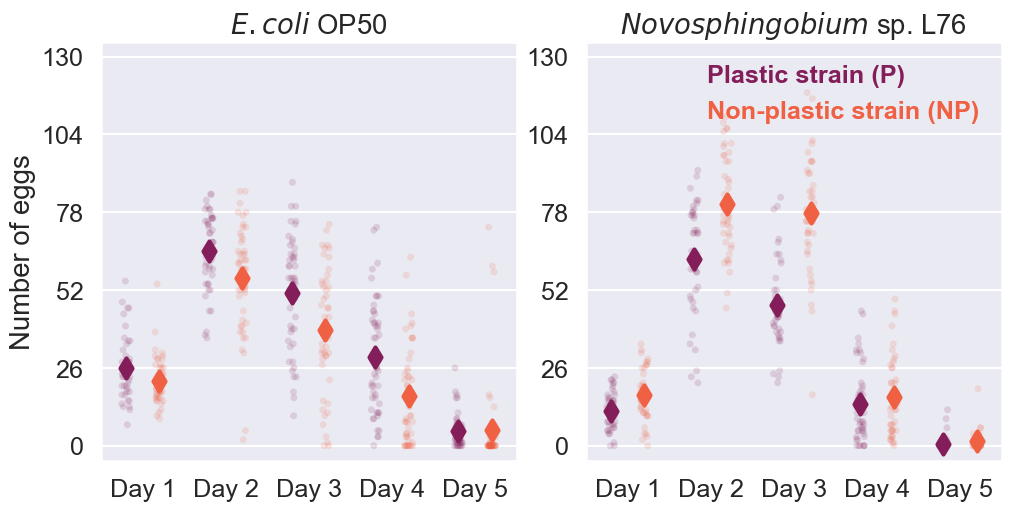

In [7]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(10, 5),
    constrained_layout=True)

axes = axes.flatten()

pal = 'rocket'
sns.stripplot(data=fec_data[fec_data['Diet']=='OP50'], x='Day', y='Progeny Count', hue='Strain', hue_order=['RSC017', 'RS5405'], dodge=True, ax=axes[0], palette=pal, alpha=0.15, zorder=1)

sns.stripplot(data=fec_data[fec_data['Diet']=='Novo'], x='Day', y='Progeny Count', hue='Strain', hue_order=['RSC017', 'RS5405'], dodge=True, ax=axes[1], palette=pal, alpha=0.15, zorder=1)

sns.pointplot(
    data=fec_data[fec_data['Diet']=='OP50'], x='Day', y='Progeny Count', hue='Strain', hue_order=['RSC017', 'RS5405'],
    join=False, dodge=.6 - .6 / 3., palette=pal,
    markers="d", scale=1, errorbar=None, ax=axes[0])

sns.pointplot(
    data=fec_data[fec_data['Diet']=='Novo'], x='Day', y='Progeny Count', hue='Strain', hue_order=['RSC017', 'RS5405'],
    join=False, dodge=.6 - .6 / 3., palette=pal,
    markers="d", scale=1, errorbar=None, ax=axes[1])

axes[0].set(xlabel='', ylim=(-5, 135), title=r'$\it{E. coli}$ OP50', yticks=np.linspace(0, 130, 6), ylabel='Number of eggs');
axes[1].set(xlabel='', ylabel='', ylim=(-5, 135), title=r'$\it{Novosphingobium}$ sp. L76', yticks=np.linspace(0, 130, 6));

axes[0].legend([], frameon=False)

handles, labels = axes[1].get_legend_handles_labels()

axes[1].legend(handles=[handles[2], handles[3]], labels=['Plastic strain (P)', 'Non-plastic strain (NP)'], frameon=False, markerscale=0, handlelength=0, handleheight=0.1, labelcolor='linecolor', prop={'weight':'bold'})


#plt.savefig('./figures/fecundity.pdf', bbox_inches='tight', dpi=300)